In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from os import walk
from keras import optimizers



In [24]:
batch_size = 200
epochs = 30

# input image dimensions
im_width, im_height = 64, 64
training_data_dir ="../input/data/data/CatsandDogs"
validation_data_dir="../input/data/data/validation"
test_data_dir="../input/data/data/testing"

In [25]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [26]:
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3),filters=16,
                 activation='relu',
                 input_shape=(im_width, im_height,1),
                 padding='valid'))
model.add(Conv2D(kernel_size=(3, 3),filters=32,
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(kernel_size=(3, 3),filters=64,
                 activation='relu',
                 padding='same'))
model.add(Conv2D(kernel_size=(5, 5),filters=128,
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size=( 3,3), strides=(2,2)))
model.add(Conv2D(kernel_size=(2, 2),
                 strides=(2,2),
                 filters=128,
                 ))


model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(150,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 31, 31, 128)       204928    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         65664     
__________

In [27]:

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
            metrics=['accuracy'])

In [28]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    color_mode = "grayscale",
    target_size=(im_width, im_height),
    batch_size=batch_size,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(im_width, im_height),
    batch_size=batch_size,
    color_mode = "grayscale",
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(im_width, im_height),
    color_mode = "grayscale",
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 15996 images belonging to 2 classes.
Found 7002 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [32]:
history=model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // batch_size,verbose=1)

Epoch 1/30
79/79 [==============================] - 25s 311ms/step - loss: 0.2591 - acc: 0.8900 - val_loss: 0.4368 - val_acc: 0.8256
Epoch 2/30
79/79 [==============================] - 23s 294ms/step - loss: 0.2459 - acc: 0.8939 - val_loss: 0.3769 - val_acc: 0.8493
Epoch 3/30
79/79 [==============================] - 23s 297ms/step - loss: 0.2481 - acc: 0.8938 - val_loss: 0.4007 - val_acc: 0.8353
Epoch 4/30
79/79 [==============================] - 22s 282ms/step - loss: 0.2373 - acc: 0.8970 - val_loss: 0.3609 - val_acc: 0.8545
Epoch 5/30
79/79 [==============================] - 22s 280ms/step - loss: 0.2333 - acc: 0.8999 - val_loss: 0.3996 - val_acc: 0.8403
Epoch 6/30
79/79 [==============================] - 23s 290ms/step - loss: 0.2267 - acc: 0.9050 - val_loss: 0.4437 - val_acc: 0.8224
Epoch 7/30
79/79 [==============================] - 22s 284ms/step - loss: 0.2276 - acc: 0.9018 - val_loss: 0.3717 - val_acc: 0.8486
Epoch 8/30
79/79 [==============================] - 22s 280ms/step - 

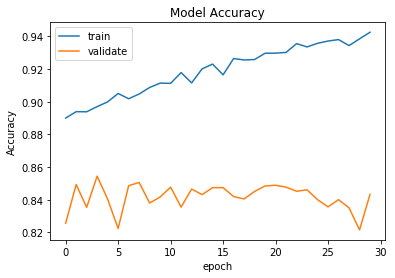

In [34]:
# summarize history for accuracy
trainAcc=history.history['acc']
testAcc=history.history['val_acc']
trainAcc[:] = [1-x for x in (history.history['acc'])]
testAcc[:] = [1-x for x in (history.history['val_acc'])]
plt.plot(trainAcc)
plt.plot(testAcc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

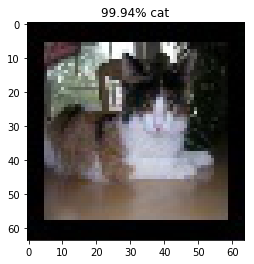

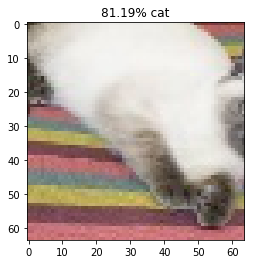

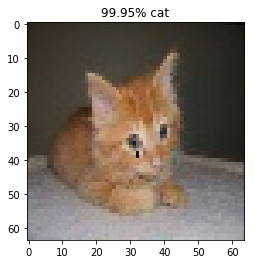

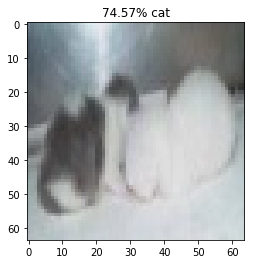

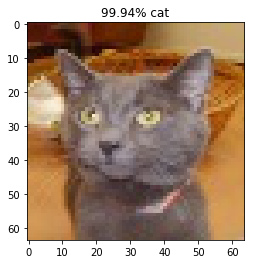

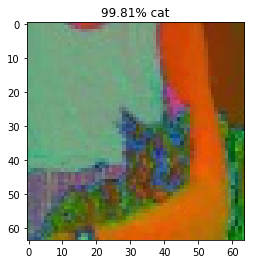

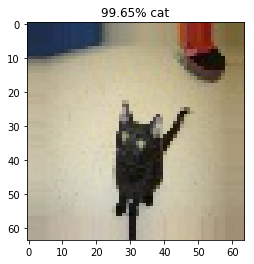

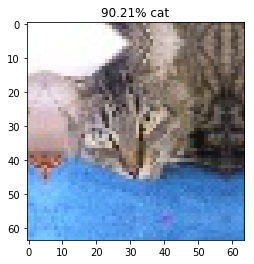

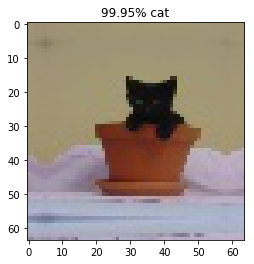

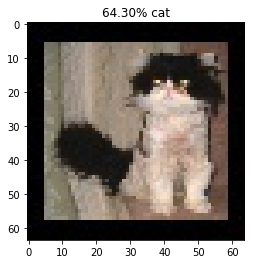

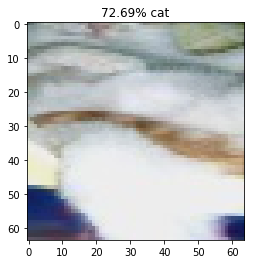

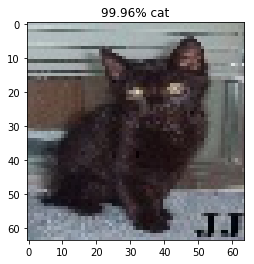

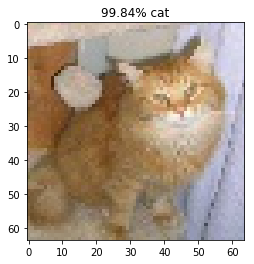

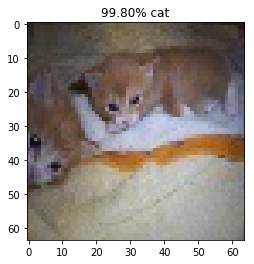

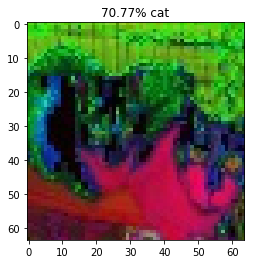

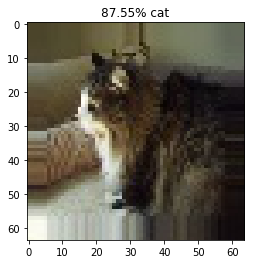

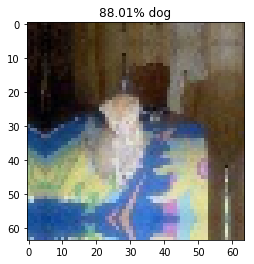

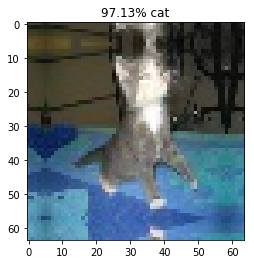

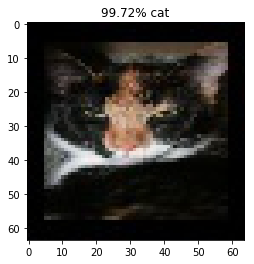

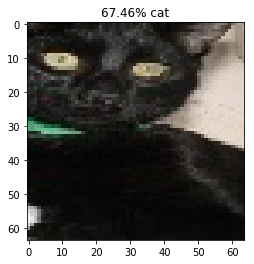

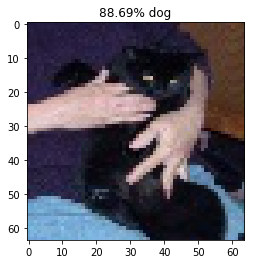

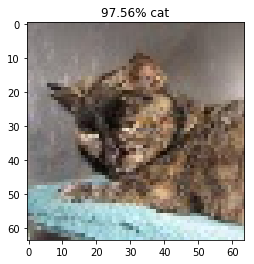

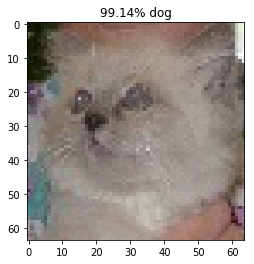

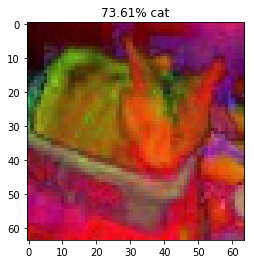

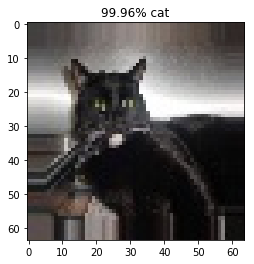

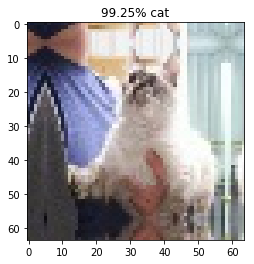

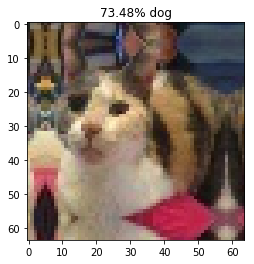

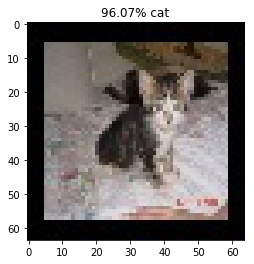

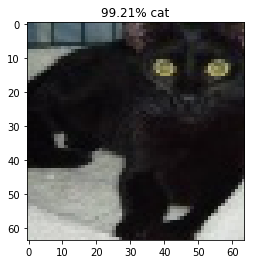

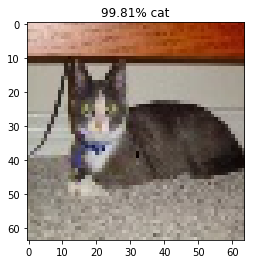

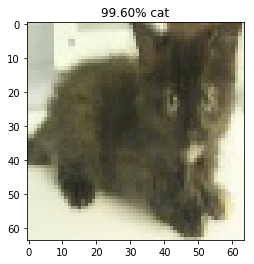

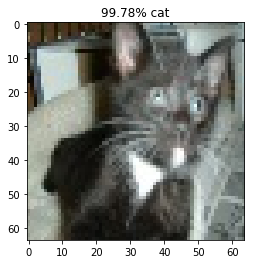

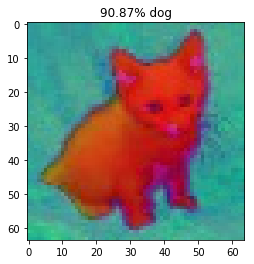

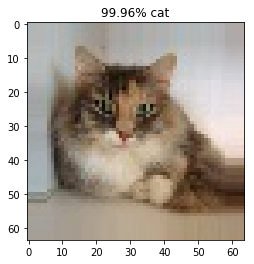

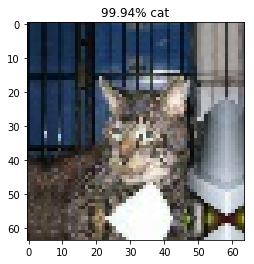

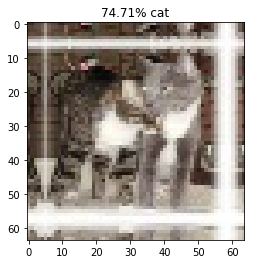

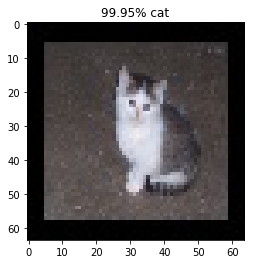

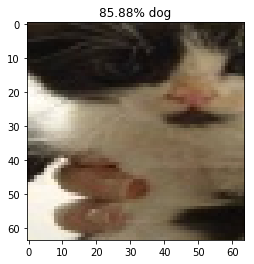

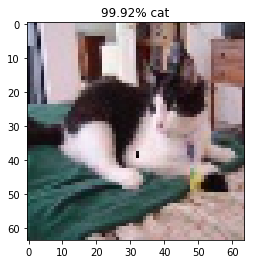

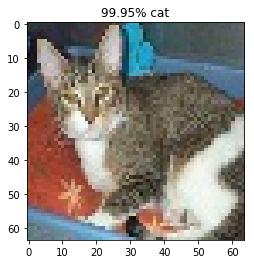

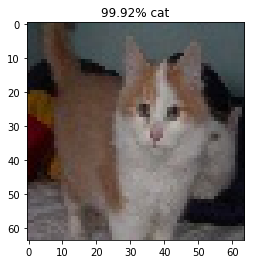

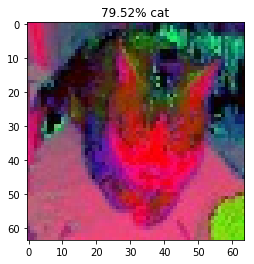

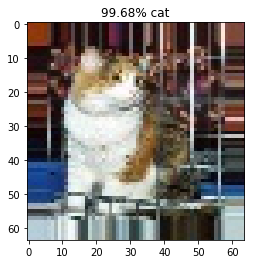

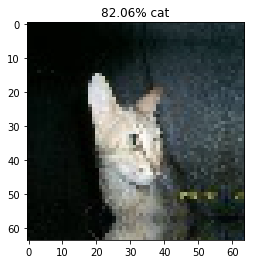

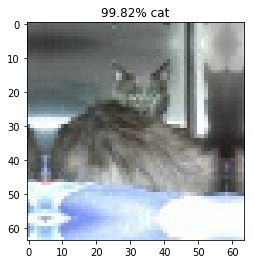

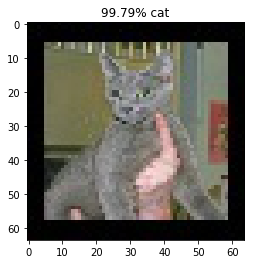

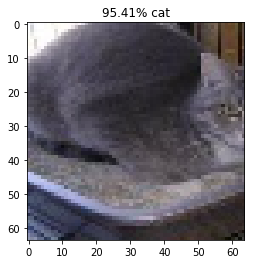

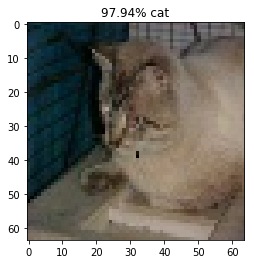

In [ ]:
TEST_SIZE = 2000
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()